In [1]:
### P578 - P644

# 1, Visual Cortex 

# 2, Convolutional Layers 

# 3, Pooling Layers 

# 4, CNN Architectures 

# 5, Object Detection 

### 1, Visual Cortex 

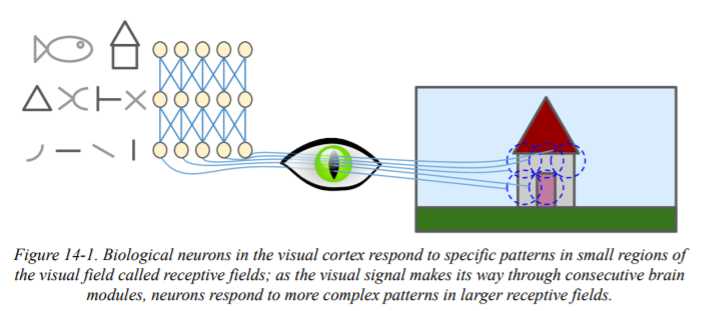

### Convolutional layers 

In [2]:
# zero padding: padding around the layer to have the same height & width - 

# stride: step from one pad 

In [3]:
# filters: vertical line filter & horizontal filter 

In [1]:
# set up 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "cnn"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

No GPU was detected. CNNs can be very slow without a GPU.


In [4]:
# plot functions 

def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")

In [5]:
### tensorflow implementation 

# image: [h, w, c] 

# wieghts: [Fh, Fw, Fn`, Fn] 

# bias: [Fn] 

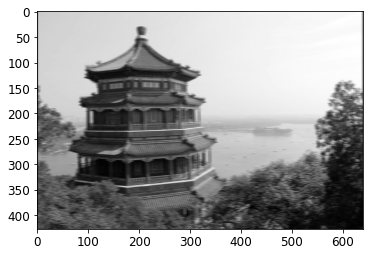

In [6]:
### an example 

from sklearn.datasets import load_sample_image 

# load sample images 
# scale
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# create two filters 
filters = np.zeros(shape=(7, 7, channels, 2), dtype = np.float32)
filters[:, 3, :, 0] = 1 # vertical line 
filters[3, :, :, 1] = 1 # horizontal line 

# padding = "SAME" means use zero padding, "VALID" means igore 
outputs = tf.nn.conv2d(images, filters, strides = 1, padding = "SAME")

plt.imshow(outputs[0, :, :, 1], cmap = "gray") # plot 1st image's 2nd feature 
plt.show() 

In [7]:
# P590

### Pooling Layers 

In [8]:
### invariance to small translations 

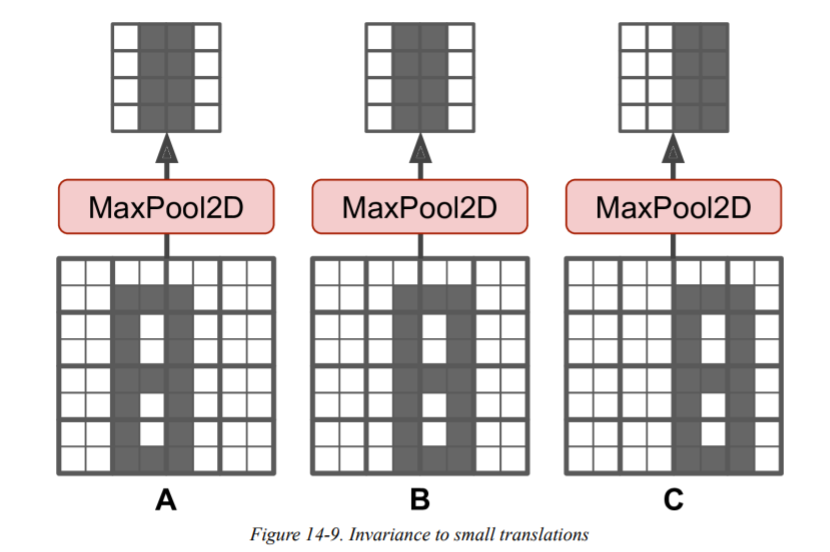

In [9]:
# tensorflow 

max_pool = keras.layers.MaxPool2D(pool_size = 2) 

In [10]:
# depth dimension pooling 

In [11]:
# global average pooling layer: compute the mean of each entire feature map 

In [12]:
global_avg_pool = keras.layers.GlobalAvgPool2D() 

### CNN Architectures 

In [13]:
### MNIST dataset 

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [14]:
# the CNN model 

model = keras.models.Sequential([
    # 64 * 7 * 7 filters, 28 * 28 pixel 
    keras.layers.Conv2D(64, 7, activation = "relu", padding = "same", 
                       input_shape = [28, 28, 1]),
    keras.layers.MaxPooling2D(2), 
    # increase the number of filters
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"), 
    keras.layers.MaxPooling2D(2), 
    keras.layers.Conv2D(256, 3, activation="relu", padding="same"), 
    keras.layers.Conv2D(128, 3, activation="relu", padding="same"),
    keras.layers.MaxPooling2D(2), 
    keras.layers.Flatten(), 
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dropout(0.5), 
    keras.layers.Dense(64, activation = 'relu'), 
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = 'relu')
    
])

In [15]:
# run and predict 

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

Epoch 1/5
1719/1719 [==============================] - 154s 88ms/step - loss: 2.6996 - accuracy: 0.0997 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 2/5
1719/1719 [==============================] - 153s 89ms/step - loss: 2.3041 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 3/5
1719/1719 [==============================] - 155s 90ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 4/5
1719/1719 [==============================] - 152s 88ms/step - loss: 2.3025 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1042
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 2.3026 - accuracy: 0.1000


### Other CNN architecture 

#### LeNet-5 

#### AlexNet: using data agumentation, and local response normalization (LRN) 

#### GoogleNet: including the incception layer 

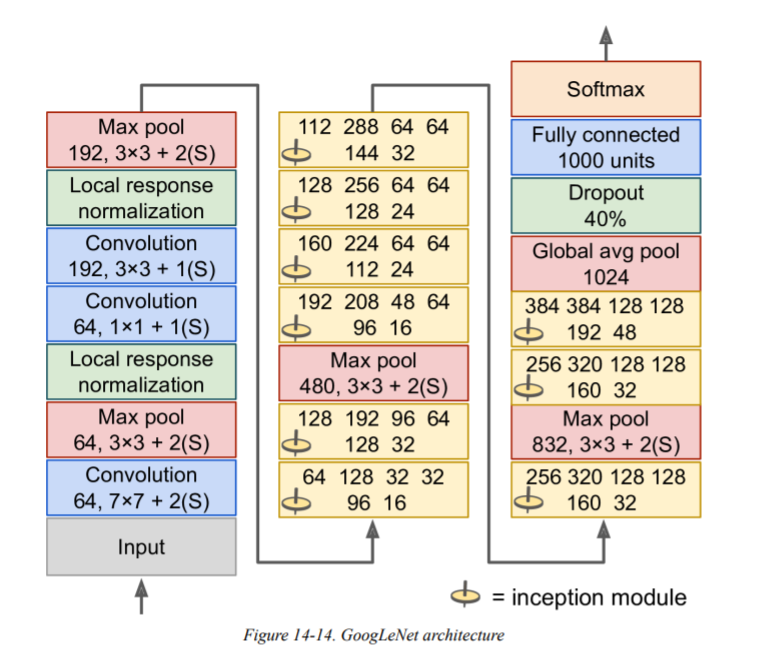


#### VGGNet 

#### ResNet 

#### Xception 

#### SENet 

#### SENet: Squeeze-and-Excitation Network Implementation

In [23]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="SAME", use_bias=False)

class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            keras.layers.BatchNormalization()]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                keras.layers.BatchNormalization()]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [24]:
model = keras.models.Sequential()
model.add(DefaultConv2D(64, kernel_size=7, strides=2,
                        input_shape=[224, 224, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation("relu"))
model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="SAME"))
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters
model.add(keras.layers.GlobalAvgPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(10, activation="softmax"))

In [25]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 112, 112, 64)      9408      
_________________________________________________________________
batch_normalization_3 (Batch (None, 112, 112, 64)      256       
_________________________________________________________________
activation_3 (Activation)    (None, 112, 112, 64)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
residual_unit (ResidualUnit) (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_1 (ResidualUni (None, 56, 56, 64)        74240     
_________________________________________________________________
residual_unit_2 (ResidualUni (None, 56, 56, 64)       

### Using Pretrained Models from Keras 

In [26]:
# load the Res-Net50

model = keras.applications.resnet50.ResNet50(weights = "imagenet")

102981632/102967424 [==============================] - 49s 0us/step


In [27]:
# resize the input into 0-1

images_resized = tf.image.resize(images, [224, 224])

In [28]:
# resize into 255

inputs = keras.applications.resnet50.preprocess_input(images_resized * 255) 

In [29]:
# make prediction 

Y_proba = model.predict(inputs)

In [30]:
# a better output with top3 prob 

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top = 3)

for image_index in range(len(images)): 
    print("Image #{}".format(image_index)) 
    for class_id, name, y_proba in top_K[image_index]:
        print(" {} - {:12s}{:.2f}%".format(class_id, name, y_proba * 100))
    print()

49152/35363 [=========================================] - 0s 8us/step
Image #0
 n02825657 - bell_cote   82.35%
 n03877845 - palace      6.75%
 n03781244 - monastery   4.19%

Image #1
 n03530642 - honeycomb   49.83%
 n13040303 - stinkhorn   33.96%
 n02206856 - bee         4.35%



### Pretraining Models for Transfer Learning 

In [31]:
import tensorflow_datasets as tfds 

dataset, info = tfds.load("tf_flowers", as_supervised = True, with_info = True) 
dataset_size = info.splits['train'].num_examples # 3670 
class_names = info.features['label'].names # ["dandelion"]
n_classes = info.features["label"].num_classes # 5 

Dataset tf_flowers downloaded and prepared to C:\Users\JZ\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


In [33]:
# split the data 

test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

In [40]:
# simple processing 

def preprocess(image, label):
    resized_image = tf.image.resize(image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

# fanicer precessing with data argument 

def central_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]])
    top_crop = (shape[0] - min_dim) // 4
    bottom_crop = shape[0] - top_crop
    left_crop = (shape[1] - min_dim) // 4
    right_crop = shape[1] - left_crop
    return image[top_crop:bottom_crop, left_crop:right_crop]

def random_crop(image):
    shape = tf.shape(image)
    min_dim = tf.reduce_min([shape[0], shape[1]]) * 90 // 100
    return tf.image.random_crop(image, [min_dim, min_dim, 3])

def preprocess(image, label, randomize=False):
    if randomize:
        cropped_image = random_crop(image)
        cropped_image = tf.image.random_flip_left_right(cropped_image)
    else:
        cropped_image = central_crop(image)
    resized_image = tf.image.resize(cropped_image, [224, 224])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label


In [41]:
# now precess the data 

batch_size = 32
train_set = train_set_raw.shuffle(1000).repeat()
train_set = train_set.map(partial(preprocess, randomize=True)).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set_raw.map(preprocess).batch(batch_size).prefetch(1)

In [43]:
# we create our keras model based on the Xceptoin model 

base_model = keras.applications.xception.Xception(weights = "imagenet", include_top = False) 

avg = keras.layers.GlobalAveragePooling2D()(base_model.output) 
output = keras.layers.Dense(n_classes, activation = "softmax")(avg) 
model = keras.Model(inputs = base_model.input, outputs = output) 

In [ ]:
# freezing the pretrained layers at the beginning 

for layer in base_model.layers: 
    layer.trainable = False

In [46]:
# compile and train the model 

for layer in base_model.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set,
                    steps_per_epoch=int(0.75 * dataset_size / batch_size),
                    validation_data=valid_set,
                    validation_steps=int(0.15 * dataset_size / batch_size),
                    epochs=5)

Epoch 1/5
86/86 [==============================] - 149s 2s/step - loss: 1.1747 - accuracy: 0.7922 - val_loss: 1.4319 - val_accuracy: 0.8033
Epoch 2/5
86/86 [==============================] - 147s 2s/step - loss: 0.5500 - accuracy: 0.9001 - val_loss: 0.9091 - val_accuracy: 0.8529
Epoch 3/5
86/86 [==============================] - 147s 2s/step - loss: 0.3389 - accuracy: 0.9175 - val_loss: 0.6670 - val_accuracy: 0.8658
Epoch 4/5
86/86 [==============================] - 149s 2s/step - loss: 0.2753 - accuracy: 0.9331 - val_loss: 0.6195 - val_accuracy: 0.8750
Epoch 5/5
86/86 [==============================] - 147s 2s/step - loss: 0.1825 - accuracy: 0.9488 - val_loss: 0.8116 - val_accuracy: 0.8585


In [ ]:
# P631